In [15]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [4]:
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist.data/255.0, mnist.target.astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [6]:
y_pred = model.predict(X_test)

In [8]:
print(confusion_matrix(y_test,y_pred))

[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]


In [9]:
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



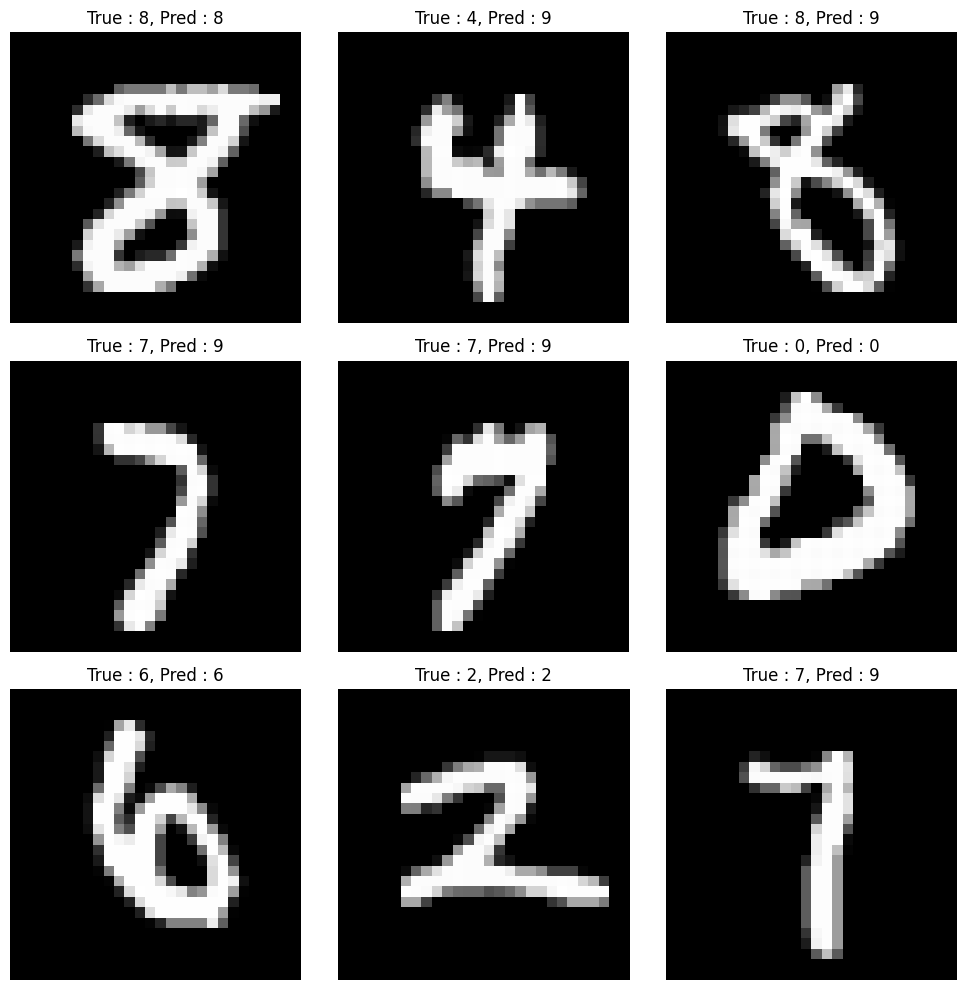

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28,28),cmap='gray')
    plt.title(f"True : {y_test.iloc[i]}, Pred : {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

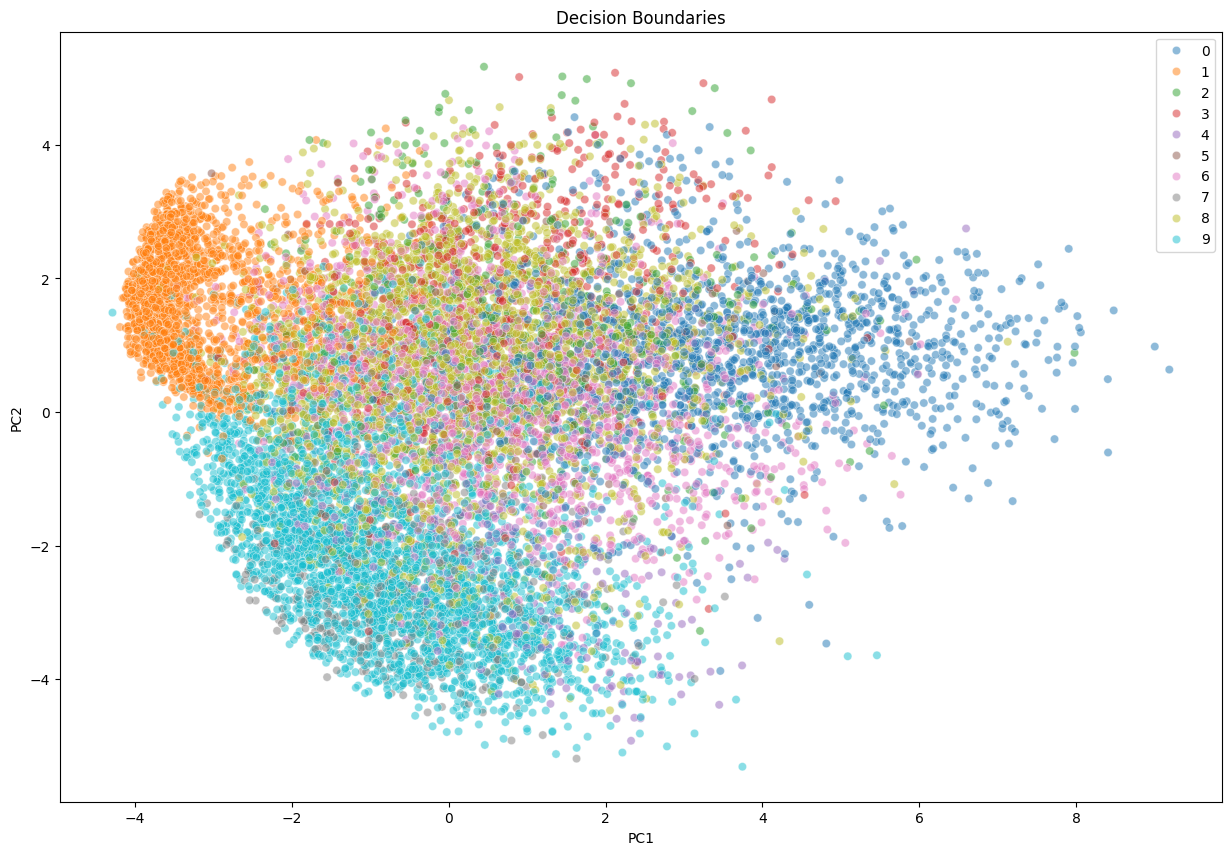

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(15,10))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_pred,palette='tab10',alpha=0.5)
plt.title("Decision Boundaries")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()